# Data Visualization
In Python, two of the most popular tools for visualizing data are **Matplotlib (low-level library)** and **Seaborn** is built on **top of Matplotlib**.

## Our dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the boston dataset from sklearn.datasets
boston_data = load_boston()
# Enter the boston data into a dataframe
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Print the first 5 rows to confirm ran correctly
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## 1. Scatter Plots
Controlling figure aesthetics : https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

In [2]:
# Set the palette and style to be more minimal
sns.set(style='ticks', palette='Set2')

Scatter plots are great for plotting **two variables** to visualize how they might **correlate** and what **relationship** there might be between the variables.

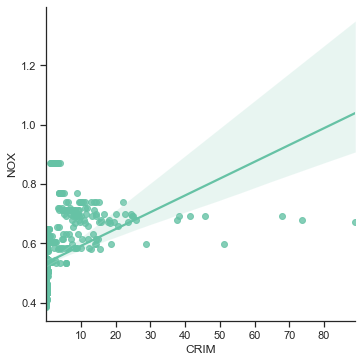

In [3]:
# Create the scatter plot
sns.lmplot(x="CRIM", y="NOX", data=boston_df)
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

## 2. Bar Plots
Bar plots can be useful when **comparing categories**.

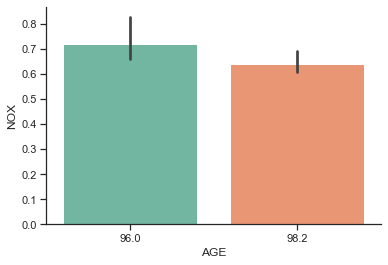

In [4]:
# Only keep for ages 96 and 98.2
boston_age_df = boston_df[boston_df["AGE"].isin([96, 98.2])]

# Create the bar plot
sns.barplot(x=boston_age_df['AGE'], y=boston_age_df['NOX'])
# Remove excess chart lines and ticks for a nicer looking plot
sns.despine()

## 3. Distributions
A <a href="https://en.wikipedia.org/wiki/Probability_distribution">probability distribution</a> is a mathematical function that provides the probabilities of the occurrence of different possible outcomes.

### a - Histogram

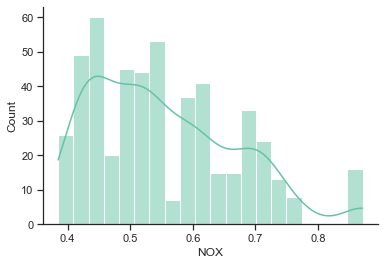

In [5]:
sns.histplot(boston_df.NOX, bins=20, kde=True)
sns.despine()

### b - Box Plot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (**minimum**, **first quartile (Q1)**, **median**, **third quartile (Q3)**, and **maximum**), the **IQR** is the distance between the 75th and 25th percentiles. It can tell you about your **outliers** and what their values are. It can also tell you if your data is **symmetrical**, how tightly your data is **grouped**, and if and how your data is **skewed**.

<a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51"><img src="Figure/Boxplot.png" alt="BoxPlot"></a>

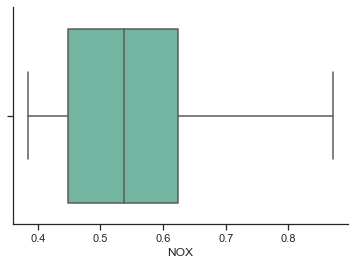

In [6]:
sns.boxplot(x=boston_df.NOX)
sns.despine()

### c - Violin Plot
Violin plot is very similar to a box plot. With this plot you have removed the box part of the **box plot** and replaced it with the **kde curve**.

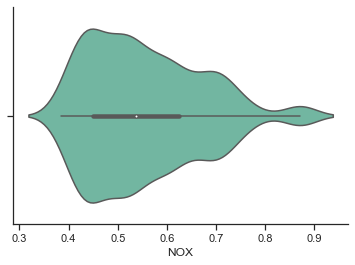

In [7]:
sns.violinplot(x=boston_df['NOX'])
sns.despine()

### d - Joint Plot
Lastly, joint plots can plot **the histogram of two variables on one plot** and also **show the scatter plot** in the middle. In the top right, you also get **the Pearson correlation coefficient** between the variables as well as **the p-value**.

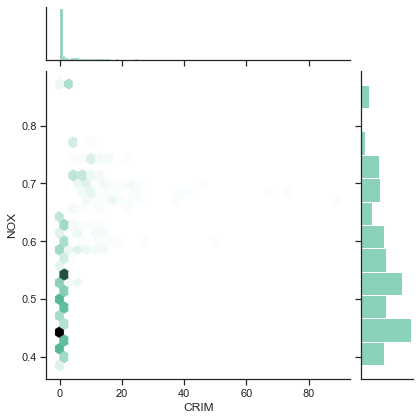

In [8]:
sns.jointplot(x=boston_df.CRIM, y=boston_df.NOX, kind="hex")
sns.despine()

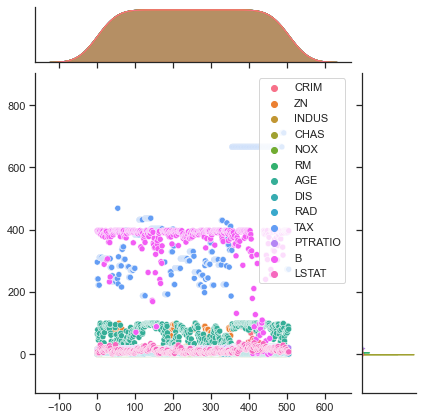

In [9]:
sns.jointplot(data= boston_df)
sns.despine()

## 4. Line Graphs

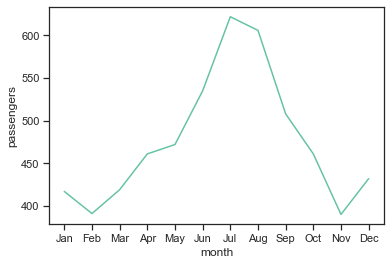

In [11]:
# importing dataset
flights=sns.load_dataset("flights")
 
# filtering the dataset to obtain the records for 1960's
flights_long=flights[flights.year == 1960]

#plotting a line graph
plot=sns.lineplot(x=flights_long.month, y=flights_long.passengers)

## 5. Heat Maps

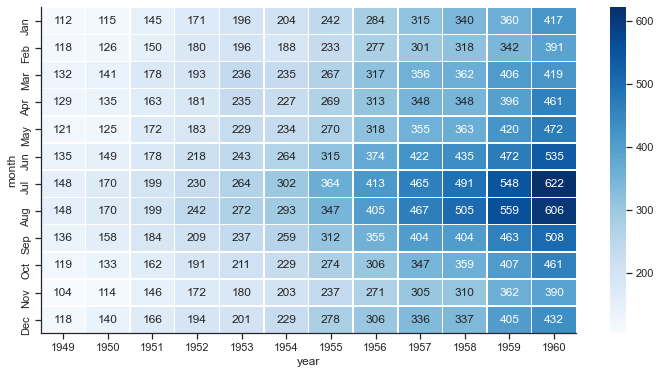

In [12]:
# Pivot the dataset from long to wide format
pivot_flights = flights.pivot("month", "year", "passengers")
# Create a larger figure size to plot on
f, ax = plt.subplots(figsize=(12, 6))
# Create the heat map
sns.heatmap(pivot_flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')
sns.despine()

## 6. Multi-Plot Grids

### a - FaceGrid and map

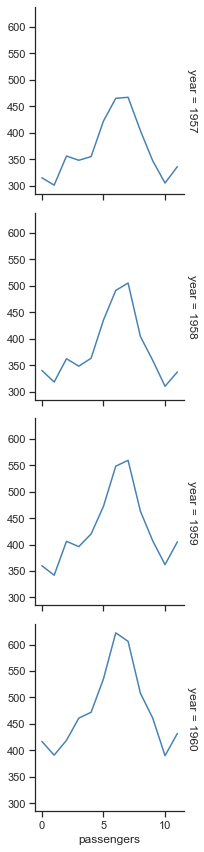

In [13]:
# Subset the data to years >= 1956 to more easily fit on the plot
flights_y = flights[flights.year > 1956]
g = sns.FacetGrid(flights_y, row="year", margin_titles=True)
g.map(plt.plot, "passengers", color="steelblue")
sns.despine()

### b - PairGrid

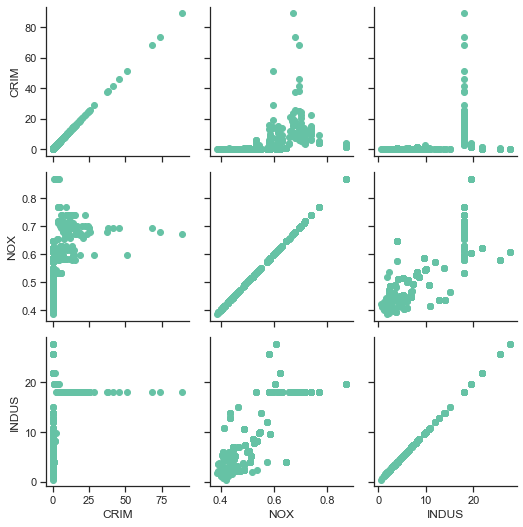

In [14]:
g = sns.PairGrid(boston_df[['CRIM', 'NOX', 'INDUS']])
g.map(plt.scatter);
sns.despine()